# data-hub:

*   [Website](https://data-hub.ir/)
*   [Youtube](https://www.youtube.com/channel/UCrBcbQWcD0ortWqHAlP94ug)
*   [Github](https://github.com/datahub-ir)
*   Telegram Channel: @**data_hub_ir**
*   Instagram Page: @**data_hub_ir**
*   Telegram Group:    @**data_jobs**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

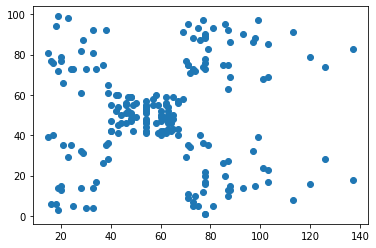

In [5]:
plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)']
            )

# KMeans

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=5, max_iter=500, n_init=10)
pred_y = kmeans.fit_predict(X)

In [8]:
kmeans.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

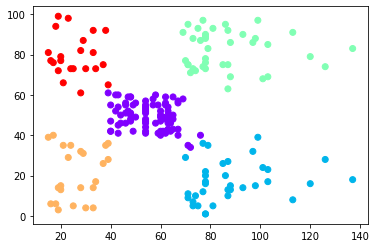

In [9]:
plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'], 
            c=kmeans.labels_,
            cmap='rainbow')

In [10]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [11]:
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30241.34361793659,
 25011.83934915659,
 21830.041978049434,
 19707.25897979477]

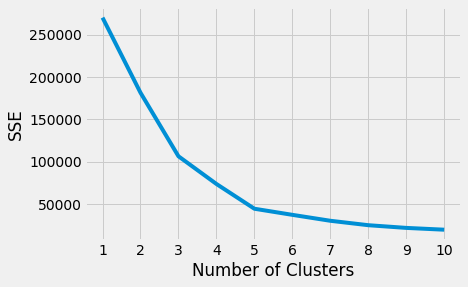

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

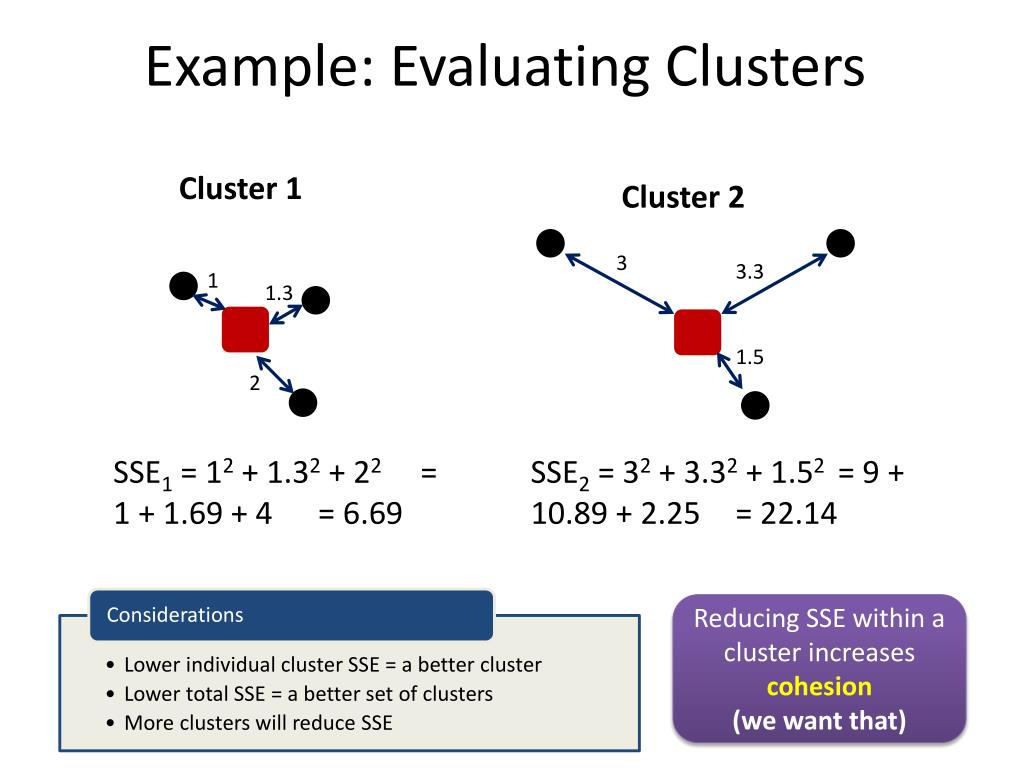

<div dir='rtl' id="dbscan"><h2 id="clustering">الگوریتم DBSCAN</h2></div>
<hr/>
<br/>
<div dir='rtl'>
    دسته‌ای دیگر از الگوریتم‌های خوشه‌بندی، الگوریتم‌های مبتنی بر تراکم است. در این الگوریتم‌ها خوشه‌ها ناحیه‌های با تراکم بالا هستند که توسط ناحیه‌های با تراکم کم از هم جدا شده‌اند. الگوریتم DBSCAN جزو این دسته‌ از الگوریتم‌ها است. عملکرد این الگوریتم در مثال زیر قابل مشاهده است.
    <br>
    <figure style="text-align:center;">
        <img src="https://datadays.sharif.edu/media/admin_file_uploads/clustering_dbscan.gif" alt="dbscan" />
        <figcaption>الگوریتم DBSCAN</figcaption>
    </figure>
    <br>
    الگوریتم DBSCAN در ابتدا یک نقطه را به تصادف انتخاب می‌کند. سپس نقطه‌هایی که در فاصله‌ی 
    $\epsilon$
    این نقطه قرار دارند را به عنوان همسایه آن در نظر می‌گیرند. در صورتی که تعداد همسایه‌های نقطه‌ی انتخاب‌شده کمتر از پارامتر <code>minPoints</code> است، این نقطه را فعلا به عنوان نویز در نظر می‌گیرد. در غیر این صورت این نقطه را به عنوان شروع یک خوشه جدید در نظر می‌گیرد و تمام همسایه‌های آن را به این خوشه اضافه می‌کند. همین کار برای نقطه‌های جدید خوشه هم تکرار می‌شود و همسایه‌های آن‌ها نیز به این خوشه اضافه می‌شوند تا جایی که دیگر نقطه‌ای اضافه نشود.
    <br>
    در این مرحله از بین نقطه‌های ملاقات نشده یک نقطه به تصادف انتخاب می‌شود و همین فرآیند تکرار می‌شود. در انتها نقاطی که به هیچ خوشه‌ای تعلق ندارند به عنوان نویز شناسایی می‌شوند.
    <br>
    <br>
    در این الگوریتم لازم نیست تعداد خوشه‌ها از ابتدا مشخص شود. هم‌چنین نسبت به K-Means خوشه‌های با شکل‌ها و اندازه‌های متنوع‌تری را می‌تواند پیدا کند. اما در صورتی میزان تراکم خوشه‌ها با هم متفاوت باشد، تعیین پارامتر‌های <code>minPoints</code> و $\epsilon$  سخت می‌شود و DBSCAN در این موارد ضعیف عمل می‌کند.
 
</div>

# DBSCAN

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
dbs = DBSCAN(eps=3, min_samples=2)
pred_y = dbs.fit_predict(X)

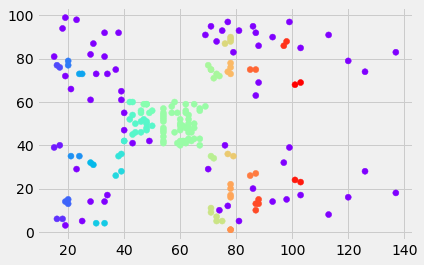

In [15]:
plt.scatter(X['Annual Income (k$)'],
            X['Spending Score (1-100)'], 
            c=dbs.labels_,
            cmap='rainbow')

# DBScan vs. KMeans

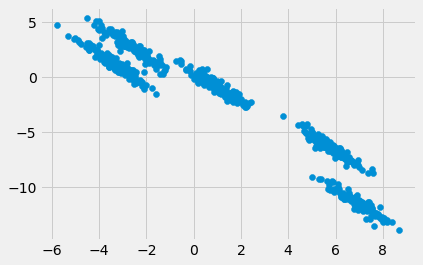

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

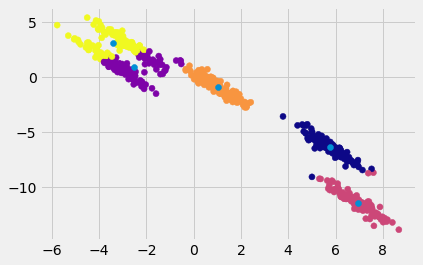

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1])

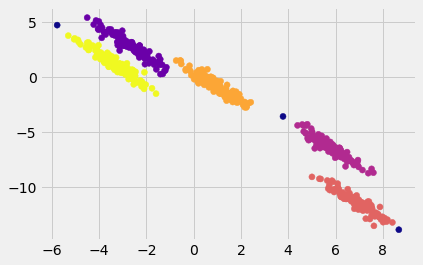

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")